# Part I - (Prosper Loan Data Exploration)

**by Carla Aluvai**

## Introduction
This document explores a dataset containing attributes before and after each loan has been processed for about 113,937 loans.


## Preliminary Wrangling

### Data Gathering

**Datasets to gather:**
1. A .csv file from Udacity (prosper_load_data.csv)

#### Libraries Used

* numpy as np - used to access data as arrays (assigned to an alias np)
* pandas as pd - used for reading files into dataframes and manupilating them (assigned to an alias pd)
* matplotlib.pyplot as plt - used to create visualizations (assigned to an alias plt)
* seaborn as sns - used to create visualizations (assigned to an alias sns)

#### Import Libraries

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

%matplotlib inline

#### Load Dataset

In [4]:
# load in the dataset into a pandas dataframe, print statistics
loans_df = pd.read_csv('prosper_loan_data.csv')

### Data Assessment

In [5]:
loans_df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [6]:
# high-level overview of data shape and composition
loans_df.shape

(113937, 81)

In [7]:
# high-level overview of data composition
loans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [8]:
# Show summary statistics of numerical features
loans_df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


#### The structure of the dataset

There are 113,937 loans with 81 features, including loan amount, borrower rate (or interest rate), current loan status, borrower income range, and many others.

#### The main feature(s) of interest in the dataset

I am interested in finding out the features that can be used to best predict the LoanOriginalAmount feature.

#### Features in the dataset that will help support my investigation into the feature(s) of interest

I suspect that the credit score will have the highest effect on the loan amount given to a borrower.

**Feature Description**

* **IncomeRange**: The income range of the borrower at the time the listing was created.
* **LoanOriginalAmount**: The origination amount of the loan.
* **IncomeVerifiable**: The borrower indicated they have the required documentation to support their income.
* **LoanKey**: Unique key for each loan. This is the same key that is used in the API.
* **CreditScoreRangeLower**: The lower value representing the range of the borrower's credit score as provided by a consumer credit rating agency.
* **StatedMonthlyIncome**: The monthly income the borrower stated at the time the listing was created.
* **ProsperScore**: A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009.
* **Investors**:The number of investors that funded the loan.
* **IsBorrowerHomeowner**: A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.


In [9]:
non_ordinal_var_dict = {'IncomeRange': ['$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']}
for var in non_ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = non_ordinal_var_dict[var])
    loans_df[var] = loans_df[var].astype(ordered_var)

In [10]:
numeric_vars = ['LoanOriginalAmount', 'StatedMonthlyIncome', 'Investors', 'ProsperScore', 'CreditScoreRangeLower']
categoric_vars = ['IncomeRange', 'IncomeVerifiable',  'IsBorrowerHomeowner']

In [11]:
# Check if there are missing values in the features of interest

print(loans_df.LoanOriginalAmount.isnull().sum())
print(loans_df.IncomeVerifiable.isnull().sum())
print(loans_df.LoanKey.isnull().sum())
print(loans_df.StatedMonthlyIncome.isnull().sum())
print(loans_df.CreditScoreRangeLower.isnull().sum())
print(loans_df.IncomeRange.isnull().sum())
print(loans_df.ProsperScore.isnull().sum())
print(loans_df.Investors.isnull().sum())
print(loans_df.IsBorrowerHomeowner.isnull().sum())

0
0
0
0
591
9168
29084
0
0


In [12]:
# Check the datatypes of the features of interest
loans_df[['LoanOriginalAmount', 'IncomeVerifiable', 'LoanKey', 'IncomeRange', 'Investors', 'StatedMonthlyIncome', 'TotalProsperPaymentsBilled', 'IsBorrowerHomeowner', 'ProsperScore', 'CreditScoreRangeLower']].dtypes

LoanOriginalAmount               int64
IncomeVerifiable                  bool
LoanKey                         object
IncomeRange                   category
Investors                        int64
StatedMonthlyIncome            float64
TotalProsperPaymentsBilled     float64
IsBorrowerHomeowner               bool
ProsperScore                   float64
CreditScoreRangeLower          float64
dtype: object

In [13]:
# Check for duplicates in the features of interest that should be unique
loans_df['LoanKey'].duplicated().sum()

871

In [14]:
# Check if ProsperScore values are between 1 and 10
loans_df[loans_df['ProsperScore'].apply(lambda x: x<1 or x>10)] 

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
69,0F37360159310530849DA23,1162592,2014-01-25 12:07:54.537000000,NaN,60,Current,NaN,0.13636,0.1139,0.1039,...,-7.15,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
158,108E36027739898797E47EC,1202850,2014-02-12 16:31:25.340000000,NaN,36,Current,NaN,0.09469,0.0809,0.0709,...,-1.96,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
224,2F293599751524472C82DEA,1130508,2014-01-10 07:24:44.853000000,NaN,36,Current,NaN,0.13799,0.1099,0.0999,...,-25.48,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
236,11D335932344051959C94C6,973657,2013-11-02 01:29:09.810000000,NaN,36,Current,NaN,0.06726,0.0605,0.0505,...,-22.10,0.0,0.0,0.0,0.0,1.0,0,0,0.0,198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113762,E41735941348970874153D6,1040844,2013-11-18 17:55:25.090000000,NaN,60,Current,NaN,0.13636,0.1139,0.1039,...,-56.88,0.0,0.0,0.0,0.0,1.0,0,0,0.0,149
113784,CF4C3593704223935C8DEF5,1021056,2013-11-05 20:51:45.540000000,NaN,36,Current,NaN,0.12691,0.0990,0.0890,...,-36.89,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113855,DF45360176809914475660A,1211163,2014-02-15 18:43:57.650000000,NaN,36,Current,NaN,0.14751,0.1189,0.1089,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,143
113881,E2C73590325077098CCF6F5,967344,2013-10-09 10:09:28.530000000,NaN,60,Current,NaN,0.19681,0.1730,0.1630,...,-64.44,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


#### Summary

The features that I am interested in are mostly clean except for these:

1. The IncomeRange, ProsperScore, and CreditScoreLower features have missing values.[Issue #1](#Issue-#1)
2. There are duplicates within the LoanKey. (the feature should be unique).([Issue #2](#Issue-#2)
3. The ProsperScore feature has incorrect values.(the score should range from 1-10)[Issue #3](#Issue-#3)


### Data Cleaning

#### Make a copy of the dataset before making any changes

In [15]:
# Copy dataframe
loans_clean = loans_df.copy()

#### Issue #1
The IncomeRange, CreditScoreRangeUpper, CreditScoreRangeLower, and ProsperPrincipalOutstanding features have missing values.

##### Define
Drop all the rows with missing values.

##### Code

In [16]:
# Subset the columns and use dropna() to delete all empty rows inplace
nulls_list = ['IncomeRange', 'CreditScoreRangeLower', 'ProsperScore']
loans_clean.dropna(subset=nulls_list, inplace=True )

##### Test

In [17]:
loans_clean[nulls_list].isnull().sum()

IncomeRange              0
CreditScoreRangeLower    0
ProsperScore             0
dtype: int64

#### Issue #2
There are duplicates within the LoanKey feature.

##### Define
Since it is normal to have duplicates of loan amount, and other features in the dataset, I will only eliminate duplicates from the LoanKey feature since it's a unique identifier of the loan.

##### Code

In [18]:
loans_clean.LoanKey.duplicated().sum()

871

In [19]:
loans_clean.drop_duplicates('LoanKey', keep='first', inplace=True)

##### Test

In [20]:
loans_clean.LoanKey.duplicated().sum()

0

#### Issue #3
The ProsperScore feature has incorrect values.(the score should range from 1-10)

##### Define
Drop all rows in the column where value is less than 1 or is greater than 10

##### Code

In [21]:
loans_clean = loans_clean.loc[~((loans_clean['ProsperScore'] <1) | (loans_clean['ProsperScore'] > 10))]                             

##### Test

In [22]:
loans_clean[loans_clean.ProsperScore.apply(lambda x: x<1 or x>10)].shape

(0, 81)

### Store Data
Export the dataframe with only the features of interest to a .csv file using pd.csv()

In [23]:
loans_clean.shape

(81857, 81)

In [24]:
# Export to csv
loans_clean.to_csv('loans_data.csv', index=False)

## Explolatory Data Analysis (EDA)
I will approach this phase by breaking it down to three steps.
1. Univariate Exploration: Explore the distribution of individual variables. [Univariate Exploration](#Univariate-Exploration)
2. Bivariate Exploration: Explore the relationship between pairs of variables. [Bivariate Exploration](#Bivariate-Exploaration)
3. Multivariate Exploration: Explore the relationship between three or more variables. [Multivariate Exploration](#Multivariate-Exploration)

### Univariate Exploration


1. [What is the distribution of LoanOriginalAmount?](#Figure-1)
2. [What is the distribution of CreditScoreRangeLower?](#Figure-2)
3. [What is the distribution the ProsperScore, Investors,  and StatedMonthlyIncome features?](#Figure-3)
4. [What is the distribution of the IncomeVerifiable, IsBorrowerHomeowner, and IncomeRange features?](#Figure-4)

In [25]:
# Import the data exported to csv earlier

loans = pd.read_csv('loans_data.csv')
loans

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
1,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
2,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
3,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
4,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81852,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
81853,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
81854,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
81855,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


In [26]:
loans[numeric_vars].describe()

,LoanOriginalAmount,StatedMonthlyIncome,Investors,ProsperScore,CreditScoreRangeLower
count,81857.000000,8.185700e+04,81857.000000,81857.000000,81857.000000
mean,8991.488999,5.929591e+03,68.292608,5.870494,698.881953
std,6201.363560,8.317895e+03,94.545246,2.300610,47.034320
min,1000.000000,8.333300e-02,1.000000,1.000000,600.000000
25%,4000.000000,3.491667e+03,1.000000,4.000000,660.000000
50%,7500.000000,5.000000e+03,32.000000,6.000000,700.000000
75%,13000.000000,7.083333e+03,97.000000,8.000000,720.000000
max,35000.000000,1.750003e+06,1189.000000,10.000000,880.000000


#### What is the distribution of  LoanOriginalAmount?

##### Figure 1



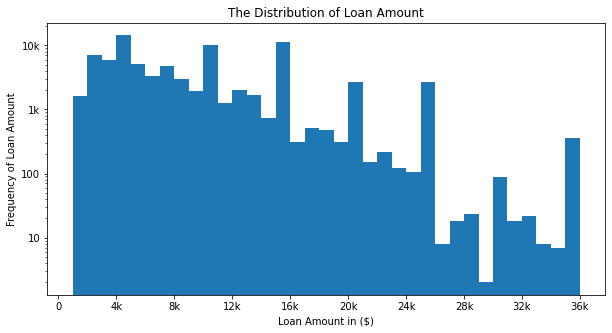

In [34]:
default_color = sns.color_palette()[0]

plt.figure(figsize=[10,5])
bins_l = np.arange(1000, loans['LoanOriginalAmount'].max()+ 2000, 1000)
plt.hist(data=loans, x='LoanOriginalAmount', bins=bins_l)
plt.xlabel('Loan Amount in ($)')
ticks_l = [0, 4e3, 8e3, 12e3, 16e3, 20e3, 24e3, 28e3, 32e3, 36e3]
labels_l = [0, '4k', '8k', '12k', '16k', '20k', '24k', '28k', '32k',  '36k']
plt.yscale('log')
plt.xlim=(loans.LoanOriginalAmount.min(), loans.LoanOriginalAmount.max())
plt.xticks(ticks_l, labels_l)
plt.yticks([10, 100, 1e3, 10e3],[10, 100, '1k', '10k'])
plt.ylabel('Frequency of Loan Amount')
plt.title('The Distribution of Loan Amount')

plt.show();

The loan amount feature's distributions are slightly skewed to the right indicating that many loans are of small amounts.
There are interesting peaks that occur in the data.

Next, I'll look at the first predictor feature of interest: Recommendations.

#### What is the distribution the CreditScoreRangeLower feature?

##### Figure 2

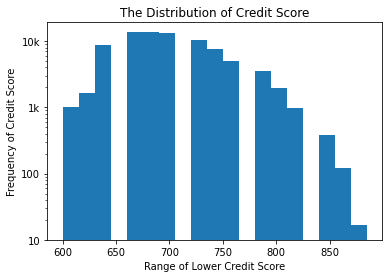

In [35]:
bins_c =  np.arange(loans.CreditScoreRangeLower.min(), loans['CreditScoreRangeLower'].max() + 10, 15)

plt.hist(data=loans, x='CreditScoreRangeLower', color=default_color, bins=bins_c)
ticks_r = np.arange(0, loans.CreditScoreRangeLower.max() + 10, 15)
label_r = np.arange(0, loans.CreditScoreRangeLower.max() + 10, 15)
plt.xlabel('Range of Lower Credit Score')
plt.yscale('log')
plt.xlim=(loans.CreditScoreRangeLower.min(), loans.CreditScoreRangeLower.max())
plt.ylabel('Frequency of Credit Score')
plt.title('The Distribution of Credit Score')
plt.yticks([10, 100, 1e3, 1e4], [10, 100, '1k', '10k'])
plt.show();

The credit score feature distribution has a long tail. The values are segmented in groups of 50. It would be interesting to see how they relate with other features. 

Moving on to the other features: PropserScore, Investors and StatedMonthlyIncome. 

#### What is the distribution the ProsperScore, Investors,  and StatedMonthlyIncome features?
##### Figure 3

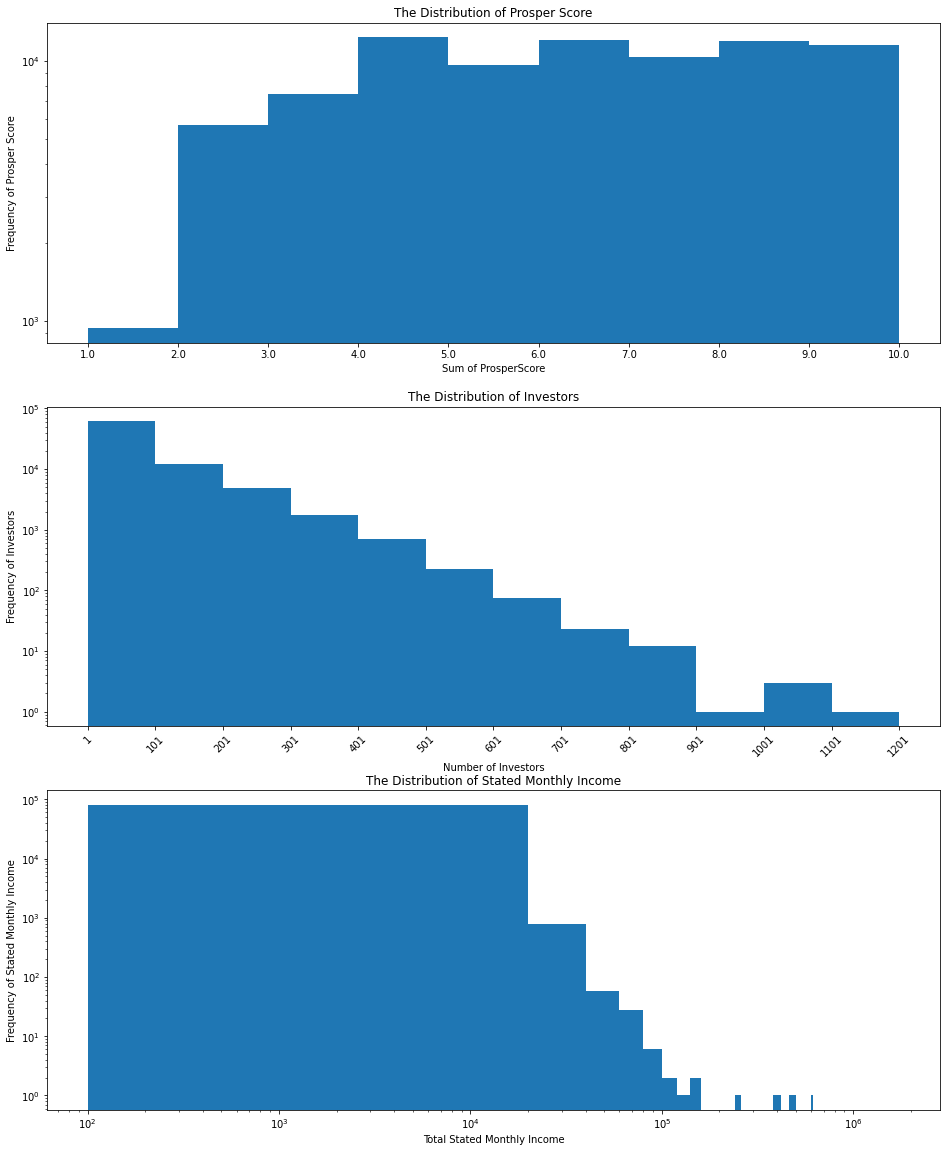

In [43]:

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize = [16,20])

bins_p = np.arange(1, loans.ProsperScore.max() + 1, 1)
ticks_p = np.arange(1, loans.ProsperScore.max() + 1, 1)
labels_p = np.arange(1, loans.ProsperScore.max() + 1, 1)
ax1.hist(data=loans, x='ProsperScore', bins=bins_p)
ax1.set_xlabel('Sum of ProsperScore')
ax1.set_yscale('log')
ax1.set(xticks=ticks_p)
ax1.set_xticklabels(labels_p)
ax1.ylim=(min(loans.ProsperScore), max(loans.ProsperScore))
ax1.set_ylabel('Frequency of Prosper Score')
ax1.set_title('The Distribution of Prosper Score')



bins_t= np.arange(loans.Investors.min(), loans.Investors.max() + 100, 100)
ticks_t = np.arange(loans.Investors.min(), loans.Investors.max() + 100, 100)
labels_t = np.arange(0, loans.Investors.max() + 100, 100)
ax2.hist(data=loans, x='Investors', bins=bins_t)
ax2.set_xlabel('Number of Investors')
ax2.set_yscale('log')
ax2.set(xticks=ticks_t)
ax2.set_xticklabels(ticks_t, rotation=45)
ax2.ylim=(min(loans.Investors), max(loans.Investors))
ax2.set_ylabel('Frequency of Investors')
ax2.set_title('The Distribution of Investors')



bins_s= np.arange(100, loans.StatedMonthlyIncome.max() + 5000, 20000)
ticks_s = [100,  50e3, 10**5, 20e4, 50e4, 80e4]
labels_s = [100, '50k', '100k','200k', '500k', '800k']
ax3.hist(data=loans, x='StatedMonthlyIncome', bins=bins_s)
ax3.set_xlabel('Total Stated Monthly Income')
ax3.set_yscale('log')
ax3.set_xscale('log')
# ax3.set(xticks=ticks_s)
# ax3.set_xticklabels(labels_s, rotation=45)
ax3.ylim=(100, max(loans.StatedMonthlyIncome))
ax3.set_ylabel('Frequency of Stated Monthly Income')
ax3.set_title('The Distribution of Stated Monthly Income')



plt.show();

The distribution of Investors shows a skew to the right. ProsperScore seems to have a slight left-skewed distribution with values ranging from 1-10. Similarly, the StatedMonthlyIncome feature is right-skewed as most values are between 100 and 10 thousand.

Before proceeding to investigate the categorical features, I will first check if there are outliers within the numeric features of interest (LoanOriginalAmount, Investors. ProsperScore, StatedMonthlyIncome, and CreditScoreRangeLower).

 I'll check out the distribution using the skew() function of numpy.

In [44]:
print('Original amount skewness:', loans.LoanOriginalAmount.skew())
print('Number of investors skewness:', loans.Investors.skew())
print('Prosper Score skewness:', loans.ProsperScore.skew())
print('Lower Credit Score skewness:', loans.CreditScoreRangeLower.skew())
print('Stated Monthly Income skewness:', loans.StatedMonthlyIncome.skew())


Original amount skewness: 1.1087433163870262
Number of investors skewness: 2.251151017540339
Prosper Score skewness: -0.03085155919780535
Lower Credit Score skewness: 0.5465021572575632
Stated Monthly Income skewness: 125.65802237440809


As suspected, three out of the five features are right-skewed by more than 1. I'll write a function that determines the lower and upper limits for each feature according to their interquartile range.

In [45]:
# A function that returns the lower and upper range limits

def get_range_limits(data):
    """ A function that takes in a column as parameter,
    calculates the interquantile range and uses it to find
    the lower and upper limits for the dataset.
    """
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3-q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    return lower_limit, upper_limit

In [46]:
print(f'OriginalLoanAmount:\n{get_range_limits(loans.LoanOriginalAmount)}\n')
print(f'Number of Investors:\n{get_range_limits(loans.Investors)}\n')
print(f'Lower Range Credit Score:\n{get_range_limits(loans.CreditScoreRangeLower)}\n')
print(f'Prosper Score:\n{get_range_limits(loans.ProsperScore)}\n')
print(f'Stated Monthly Income:\n{get_range_limits(loans.StatedMonthlyIncome)}\n')


OriginalLoanAmount:
(-9500.0, 26500.0)

Number of Investors:
(-143.0, 241.0)

Lower Range Credit Score:
(570.0, 810.0)

Prosper Score:
(-2.0, 14.0)

Stated Monthly Income:
(-1895.8333319999997, 12470.833331999998)



#### Outliers Treatment.

In [47]:
print(f'Most common loan amount: {loans.LoanOriginalAmount.mode()}')
print(f'Most common number of investors: {loans.Investors.mode()}')
print(f'Most common lower credit score: {loans.CreditScoreRangeLower.mode()}')
print(f'Most common prosper score: {loans.ProsperScore.mode()}')
print(f'Most common stated income: {loans.StatedMonthlyIncome.mode()}')

Most common loan amount: 0    4000
Name: LoanOriginalAmount, dtype: int64
Most common number of investors: 0    1
Name: Investors, dtype: int64
Most common lower credit score: 0    660.0
Name: CreditScoreRangeLower, dtype: float64
Most common prosper score: 0    4.0
Name: ProsperScore, dtype: float64
Most common stated income: 0    4166.666667
Name: StatedMonthlyIncome, dtype: float64


In [49]:
# Check the percentage of outliers
original_amount_outliers = loans[loans.LoanOriginalAmount.apply(lambda x: -9500<x>26500)]
score_credit_outliers = loans[loans.CreditScoreRangeLower.apply(lambda x: 570<x>810)]
num_investors_outliers = loans[loans.Investors.apply(lambda x: -143<x>241)]
monthly_income_outliers = loans[loans.StatedMonthlyIncome.apply(lambda x: -1895.8<x>12470)]
prosper_score_outliers = loans[loans.ProsperScore.apply(lambda x: -2<x>14)]

print(f'Original Loan Outliers: {round(len(original_amount_outliers)/len(loans) * 100)}%')
print(f'Credit Score Outliers: {round(len(score_credit_outliers)/len(loans) * 100)}%')
print(f'Investors Outliers: {round(len(num_investors_outliers)/len(loans) * 100)}%')
print(f'Monthly Income Outliers: {round(len(monthly_income_outliers)/len(loans) * 100)}%')
print(f'Prosper Score Outliers: {round(len(prosper_score_outliers)/len(loans) * 100)}%')

Original Loan Outliers: 1%
Credit Score Outliers: 2%
Investors Outliers: 6%
Monthly Income Outliers: 5%
Prosper Score Outliers: 0%


The accumulative number of outliers in the dataset is 14%. In order to maintain less bias among the features, I will drop all the outliers from the dataset.

I will use the IQR to floor and cap the values for each feature.

In [50]:
# Get the lower and upper limits of each feature
loan_amount_limits = get_range_limits(loans.LoanOriginalAmount)
credit_score_limits = get_range_limits(loans.CreditScoreRangeLower)
num_investors_limits = get_range_limits(loans.Investors)
monthly_income_limits = get_range_limits(loans.StatedMonthlyIncome)

In [51]:
loans.LoanOriginalAmount = np.where(loans.LoanOriginalAmount > loan_amount_limits[1], loan_amount_limits[1], 
                                   np.where(loans.LoanOriginalAmount < loan_amount_limits[0], loan_amount_limits[0], loans['LoanOriginalAmount']))

In [52]:
loans.CreditScoreRangeLower = np.where(loans.CreditScoreRangeLower >credit_score_limits[1], credit_score_limits[1], 
                                   np.where(loans.CreditScoreRangeLower < credit_score_limits[0], credit_score_limits[0], loans['CreditScoreRangeLower']))

In [53]:
loans.Investors = np.where(loans.Investors >num_investors_limits[1], num_investors_limits[1], 
                                   np.where(loans.Investors < num_investors_limits[0], num_investors_limits[0], loans['Investors']))

In [54]:
loans.StatedMonthlyIncome = np.where(loans.StatedMonthlyIncome >monthly_income_limits[1], monthly_income_limits[1], 
                                   np.where(loans.StatedMonthlyIncome < monthly_income_limits[0], monthly_income_limits[0], loans['StatedMonthlyIncome']))

I'll use boxplots to investigate if outliers still exist in the dataset.

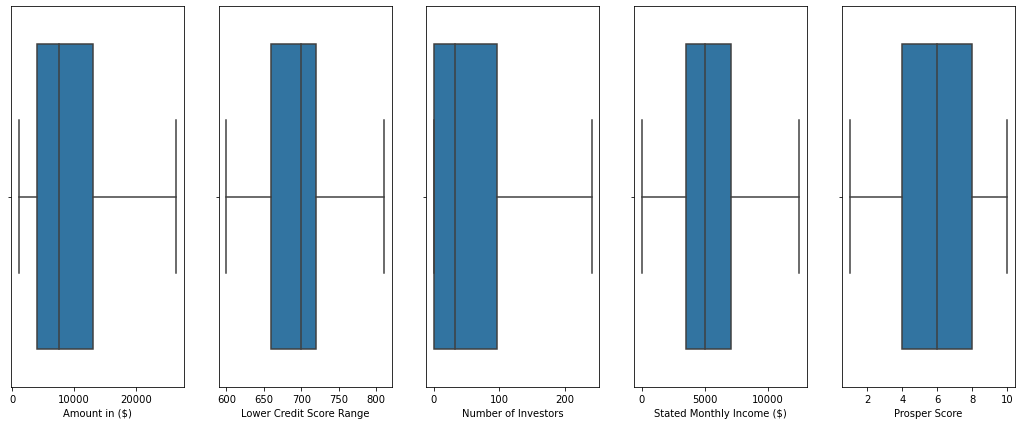

In [55]:
fig = plt.figure(figsize=[18,7])


plt.subplot(1,5,1)
sns.boxplot(data=loans, x='LoanOriginalAmount')
# plt.title('Original Loan Amount Distribution')
plt.xlabel('Amount in ($)')



plt.subplot(1,5, 2)
sns.boxplot(data=loans, x='CreditScoreRangeLower')
plt.xlabel('Lower Credit Score Range')
# plt.title('Range of Credit Score')

plt.subplot(1,5, 3)
sns.boxplot(data=loans, x='Investors')
plt.xlabel('Number of Investors')

plt.subplot(1,5, 4)
sns.boxplot(data=loans, x='StatedMonthlyIncome')
plt.xlabel('Stated Monthly Income ($)')

plt.subplot(1,5, 5)
sns.boxplot(data=loans, x='ProsperScore')
plt.xlabel('Prosper Score')

plt.show();

In [56]:
loans[numeric_vars].describe()

,LoanOriginalAmount,StatedMonthlyIncome,Investors,ProsperScore,CreditScoreRangeLower
count,81857.000000,81857.000000,81857.000000,81857.000000,81857.000000
mean,8946.404022,5602.239398,62.115323,5.870494,698.530242
std,6043.657783,2860.285590,74.698754,2.300610,46.083817
min,1000.000000,0.083333,1.000000,1.000000,600.000000
25%,4000.000000,3491.666667,1.000000,4.000000,660.000000
50%,7500.000000,5000.000000,32.000000,6.000000,700.000000
75%,13000.000000,7083.333333,97.000000,8.000000,720.000000
max,26500.000000,12470.833332,241.000000,10.000000,810.000000


The box plots show that there are no outliers present in the numerical features.

Additionally:
* 50% of the loan amounts is between 4000 and 13000 Dollars.
* 50% of the credit score range is between 660 and 720.
* 50% of the stated monthly income ranges between 3491 and 7083.
* 50% the of prosper score range between 4 and 8.


On to the categorical features.

In [1392]:
loans.shape

(81857, 81)

#### What is the distribution of the IncomeVerifiable,  IsBorrowerHomeowner, and IncomeRange features?

##### Figure 3

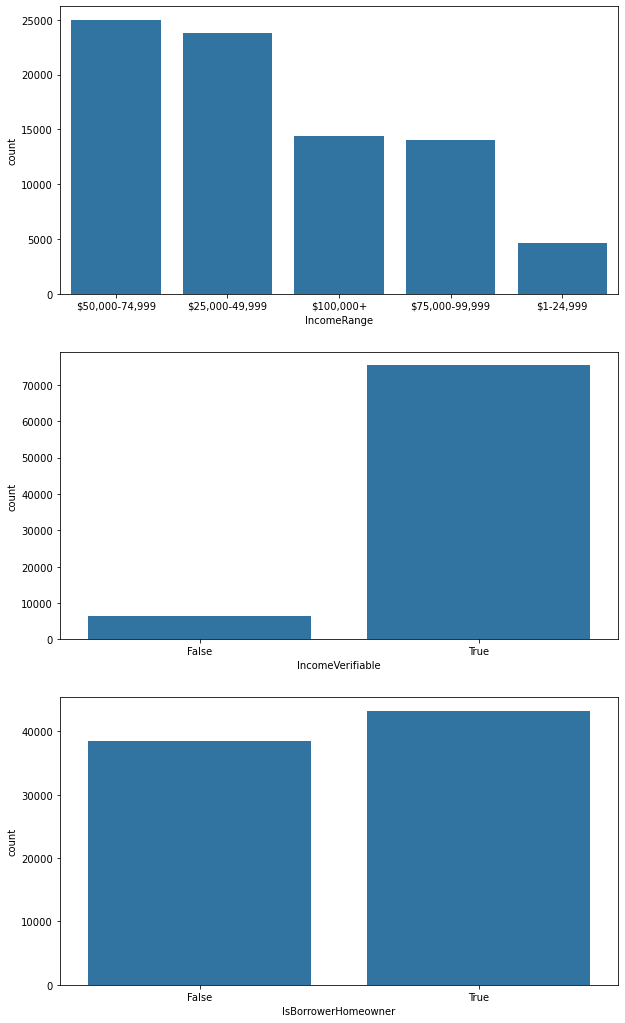

In [57]:
fig, ax = plt.subplots(nrows=3, figsize = [10,18])

sns.countplot(data = loans, x = 'IncomeRange', color = default_color, ax = ax[0])
sns.countplot(data = loans, x = 'IncomeVerifiable', color = default_color, ax = ax[1])
sns.countplot(data = loans, x = 'IsBorrowerHomeowner', color = default_color, ax = ax[2])
plt.show();

According to the above plots and summary statistics:
* The highest frequency is of borrowers who have an income range of between 50,000 and 74,999 Dollars, and the lowest frequency is of those that earn between 1 and 24,999 Dollars.
* A Majority of the borrowers have verifiable income sources.
* There's a small difference in whether the borrower is a homeowner or not.


### Univariate Observations

Loan amount has a wide range of distribution with most loans being on the lower amount end. Transformed to a log-scale, there's a pattern in the distribution whereby there's a peak after every 5000. The more unusual occurrence is the huge steep just before 30000.


In order to properly visualize the income range feature, I converted the column into a categorical variable with specific groups which in turn dropped null values. Additionally, I dropped duplicates and empty rows from my select features.

There were outliers present in the numerical variables of interest. The features with outliers had values exceeding the upper limit (q3 + 1.5 * iqr). I chose to treat them by flooring and capping them using the interquartile range method.

## Bivariate Exploration
I will investigate the pairwise correlation present between features in the dataset.

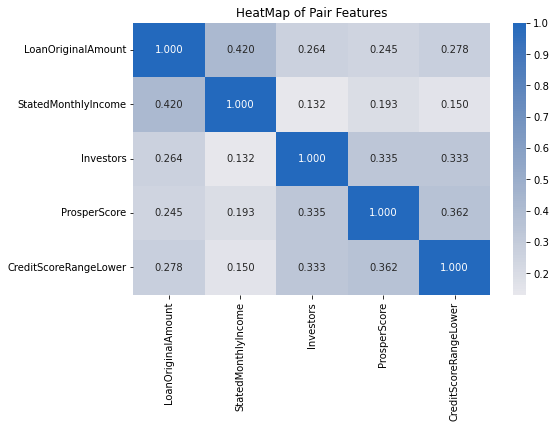

In [58]:
# plot correlation
plt.figure(figsize = [8, 5])
sns.heatmap(loans[numeric_vars].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0)
plt.title('HeatMap of Pair Features')
plt.show();

Loan amount has weak correlation with all the other features with the highest being the stated monthly income. Also all the features seem to relate with each other in some way.

In [59]:
loans_samp = loans.sample(n=500, replace=False)

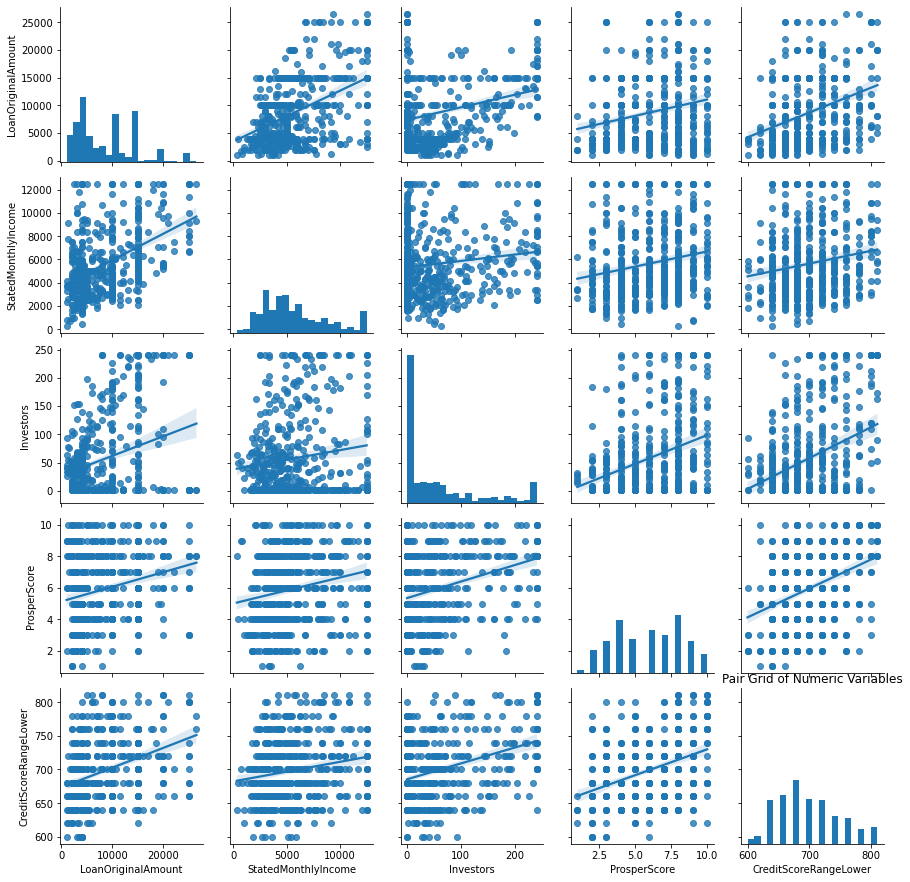

In [61]:
g = sns.PairGrid(data = loans_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(sns.regplot)
plt.title('Pair Grid of Numeric Variables')
plt.show();

<Figure size 1152x1008 with 0 Axes>

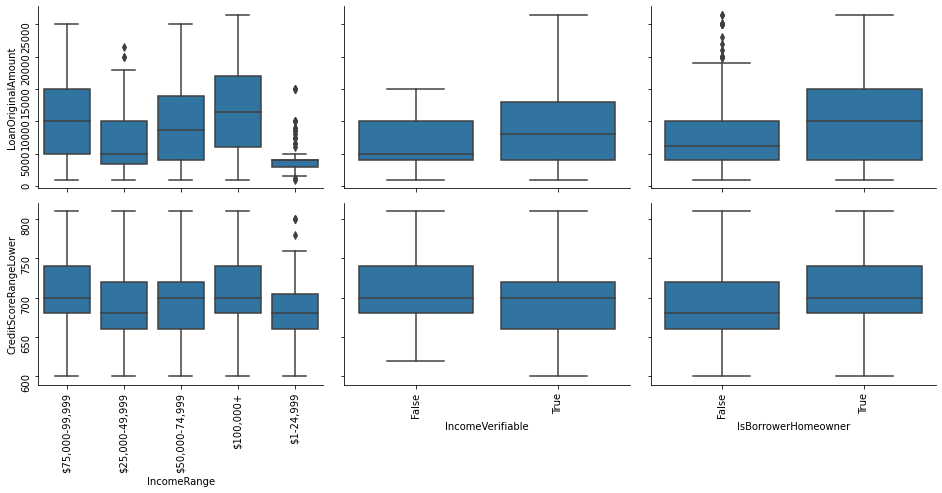

In [62]:
cat_samp = loans.sample(n=2000, replace=False)

def boxgrid(x,y, **kwargs):
    sns.boxplot(x=x, y=y, color=default_color)
  
    
plt.figure(figsize = [16, 14])
# sns.set(font_scale=1.6)
h = sns.PairGrid(data=cat_samp, y_vars=['LoanOriginalAmount', 'CreditScoreRangeLower'], x_vars=categoric_vars, height=3, aspect=1.5)
for ax in h.axes.flatten():
    ax.tick_params(rotation=90)
h.map(boxgrid)
plt.show();

We notice a few things:
* Borrowers whose income is verifiable a higher range on the loan amount compared to those whose income isn't verifiable. The loan amount lowest amount remains at the same level for both parties.
* It appears that the higher the income range borrowers have the highest minimum lower credit score and the highest minimum loan amount. Borrower with the lowest income range have the lowest minimum and maximum loan amount.
* Borrowers who are homeowners have a high minimum and maximum credit score and high maximum loan amount.

Let's observe the relationship between the categorical features next.

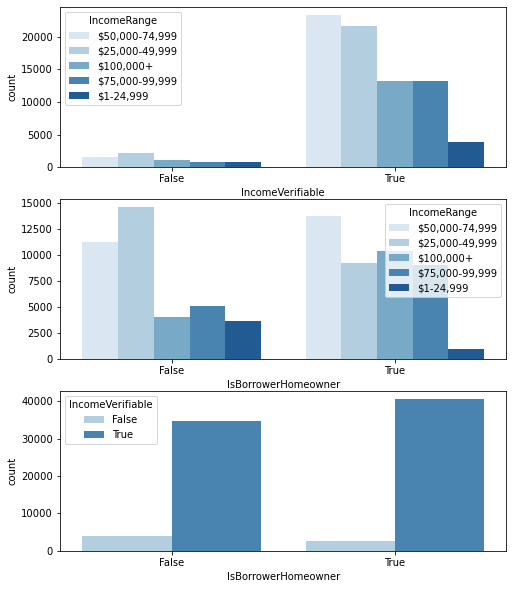

In [63]:
plt.figure(figsize = [8, 10])

plt.subplot(3, 1, 1)
sns.countplot(data = loans, x = 'IncomeVerifiable', hue = 'IncomeRange', palette = 'Blues')


plt.subplot(3, 1, 2)
sns.countplot(data = loans, x = 'IsBorrowerHomeowner', hue = 'IncomeRange', palette = 'Blues')


plt.subplot(3, 1, 3)
sns.countplot(data = loans, x = 'IsBorrowerHomeowner', hue = 'IncomeVerifiable', palette = 'Blues')


plt.show();

It looks like borrowers whose income is verifiable tend to have a high income range in general, and those who are homeowners tend to also have a higher income range on average. It also shows that being a home owner is not associated with income being verifiable.

I will continue to explore the data more to see how loan amount and credit score range relate to the rest of the features.

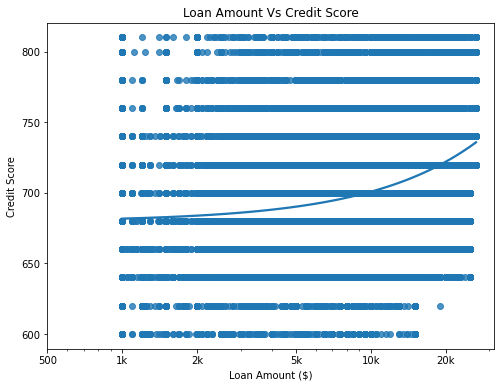

In [64]:
plt.figure(figsize = [8, 6])
sns.regplot(data = loans, y= 'CreditScoreRangeLower', x = 'LoanOriginalAmount')
plt.xlabel('Loan Amount ($)')
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.ylabel('Credit Score')
plt.title('Loan Amount Vs Credit Score')
plt.show();

The relationship is somewhat linear but it is not strong.

Since ProsperScore had a slight positive with CreditScoreRangeLower, let's see how it relates to LoanOriginalAmount.

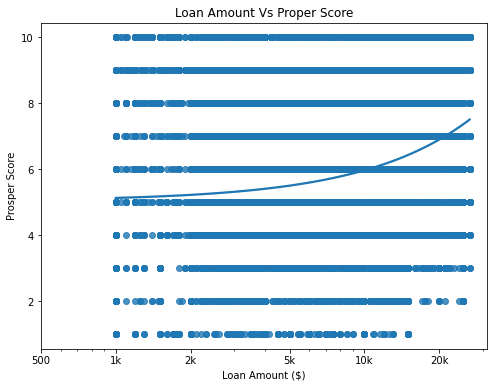

In [65]:
plt.figure(figsize = [8, 6])
sns.regplot(data = loans,  y= 'ProsperScore', x= 'LoanOriginalAmount')
plt.xlabel('Loan Amount ($)')
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.ylabel('Prosper Score')
plt.title('Loan Amount Vs Proper Score')
plt.show();

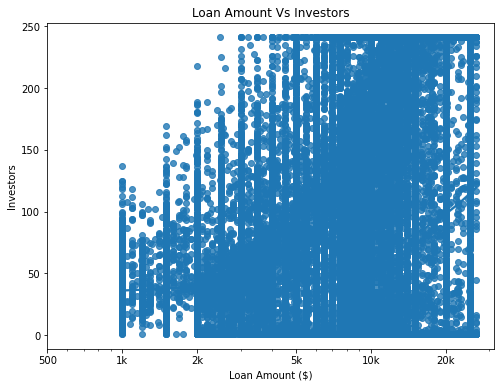

In [66]:
plt.figure(figsize = [8, 6])
sns.regplot(data = loans, y = 'Investors', x= 'LoanOriginalAmount')
plt.xlabel('Loan Amount ($)')
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.ylabel('Investors')
plt.title('Loan Amount Vs Investors')
plt.show();

Still the relationship is not strong. Next I'll plot the categorical variables against the four numeric variables to see if there's a correlation.

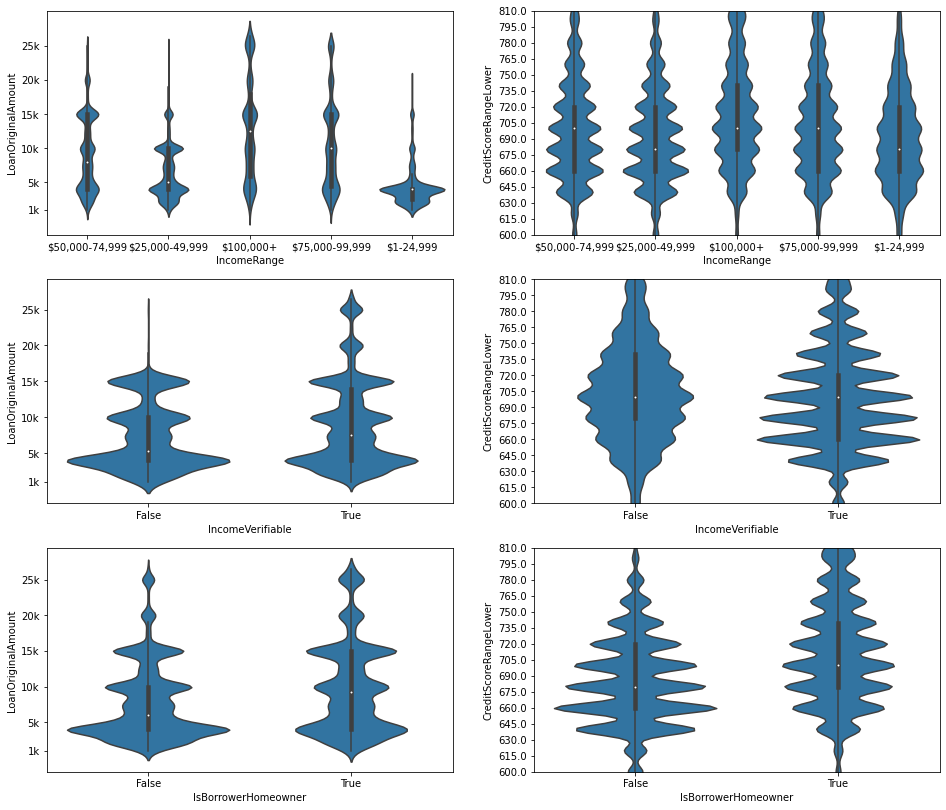

In [67]:
# sns.violinplot(data=loans, x='IncomeRange', y='LoanOriginalAmount', inner='quartile', hue='IncomeVerifiable')
# plt.xticks(rotation=15);

fig, ax = plt.subplots(ncols = 2, nrows = 3 , figsize = [16,14])

for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    sns.violinplot(data = loans, x = var, y = 'LoanOriginalAmount', ax = ax[i,0],
               color = default_color)
    ax[i,0].set_yticks(np.array([1e3, 5e3, 1e4, 15e3, 2e4, 25e3]))
    ax[i,0].set_yticklabels(['1k', '5k', '10k', '15k', '20k', '25k'])
    sns.violinplot(data = loans, x = var, y = 'CreditScoreRangeLower', ax = ax[i,1],
               color = default_color)
    ax[i,1].set_yticks((np.array(ticks_r)))
    ax[i,1].set_yticklabels(ticks_r)
    ax[i,1].set_ylim([loans.CreditScoreRangeLower.min(), loans.CreditScoreRangeLower.max()])

plt.show();

### Bivariate Observations

From all the features of my interest, loan original amount had the highest correlation with stated monthly income followed closely by credit score range, and investors. It also seems as though the higher the income range, the higher the maximum loan amount. By using the pair grids we see that borrowers with the lower income ranges mostly have a loan amount of below 5k. The grids also break it down so we can see that the credit score has very little to do with if the borrower is a home owner. 


There were relationships between ProsperScore, CreditScoreRangeLower, Investors, and StatedMonthlyIncome.  The first two had the highest correlation compared to the rest of the features. It also looks like borrowers whose income is verifiable tend to have a high income range in general, and those who are homeowners tend to also have a higher income range on average.

## Multivariate Exploration

In this section, I will continue to follow through investigating the multilevel relationships between the features.

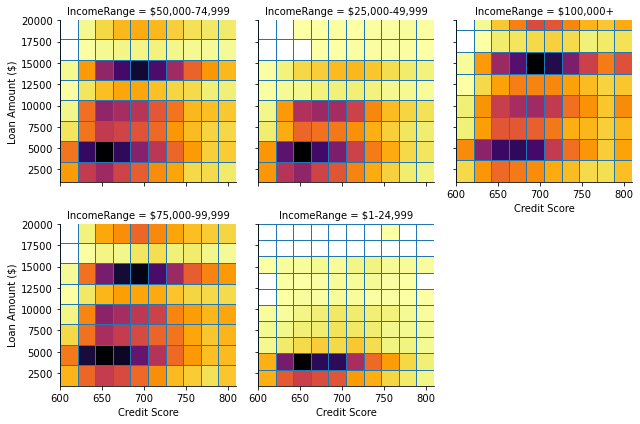

In [68]:
# create faceted heat maps on ranges of  the income range variable
h = sns.FacetGrid(data = loans, col = 'IncomeRange', col_wrap = 3, height = 3)
h.map(plt.hist2d, 'CreditScoreRangeLower', 'LoanOriginalAmount', cmap='inferno_r', cmin=2)
h.set_xlabels('Credit Score')
h.set_ylabels('Loan Amount ($)')

plt.show();

We see that values of loan amount and credit score intensify somewhat on higher income ranges.

I will continue looking at the income verifiable variable..

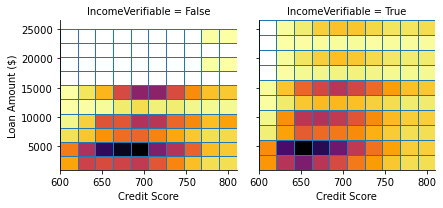

In [69]:
# create faceted heat maps on the income verifiable variable
h = sns.FacetGrid(data = loans, col = 'IncomeVerifiable', col_wrap = 3, height = 3)
h.map(plt.hist2d, 'CreditScoreRangeLower', 'LoanOriginalAmount', cmap='inferno_r', cmin=2)
h.set_xlabels('Credit Score')
h.set_ylabels('Loan Amount ($)')

plt.show();

Borrowers whose income is not verifiable have credit scores spread mostly on the higher range even though their loan amount is lower.

I'll look at the last categorical feature, 

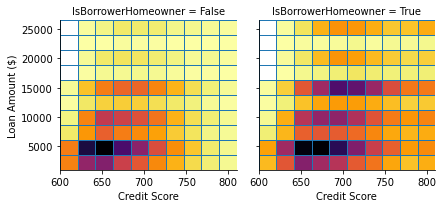

In [70]:
# create faceted heat maps on the isborrowerhomeowner variable
h = sns.FacetGrid(data = loans, col = 'IsBorrowerHomeowner', col_wrap = 3, height = 3)
h.map(plt.hist2d, 'CreditScoreRangeLower', 'LoanOriginalAmount', cmap='inferno_r', cmin=2)
h.set_xlabels('Credit Score')
h.set_ylabels('Loan Amount ($)')

plt.show();

There is an intensity when the borrower is a homeowner.

I will look at another heatmap, this time including the two boolean features (IsBorrowerHomeowner and IncomeVerifiable).

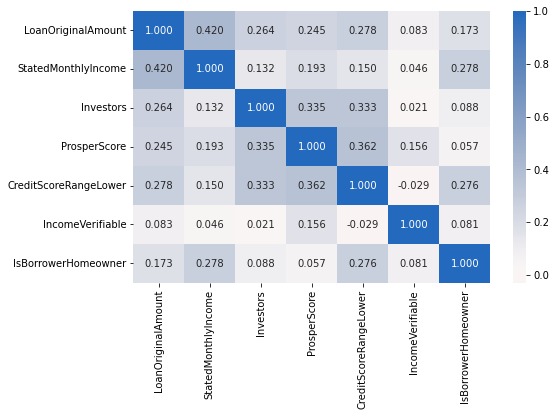

In [71]:
plt.figure(figsize = [8, 5])
b = ['LoanOriginalAmount',
 'StatedMonthlyIncome',
 'Investors',
 'ProsperScore',
 'CreditScoreRangeLower', 'IncomeVerifiable', 'IsBorrowerHomeowner']
sns.heatmap(loans[b].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show();

With the inclusion of the two boolean features, we see although being a homeowner has little association with the loan amount, it does have a higher association with the stated monthly income and the credit score. The income verifiable feature associates very slightly with the prosper score.



I'll wrap up by investigating more on correlations between the loan amount and the categorical variables.

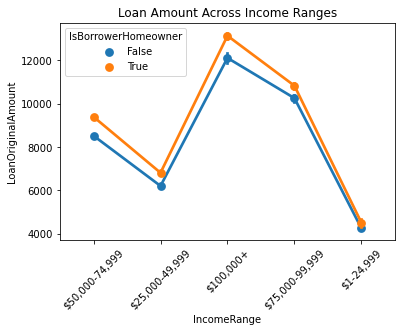

In [72]:
sns.pointplot(data=loans, x='IncomeRange', y='LoanOriginalAmount', hue='IsBorrowerHomeowner', linestyles='-')
plt.title('Loan Amount Across Income Ranges')
plt.xticks(rotation=45)
plt.show();

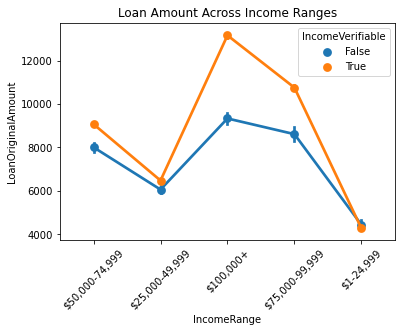

In [73]:
sns.pointplot(data=loans, x='IncomeRange', y='LoanOriginalAmount', hue='IncomeVerifiable', linestyles='-')
plt.title('Loan Amount Across Income Ranges')
plt.xticks(rotation=45)
plt.show();

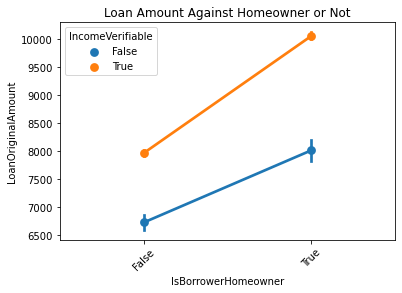

In [74]:
sns.pointplot(data=loans, x='IsBorrowerHomeowner', y='LoanOriginalAmount', hue='IncomeVerifiable', linestyles='-')
plt.title('Loan Amount Against Homeowner or Not')
plt.xticks(rotation=45)
plt.show();

### Multivariate Observations

By observing the IncomeRange, IncomeVerifiable, and IsBorrowerHomeowner separately against LoanAmount and CreditScoreRangeLower features using faceted histograms and point plot. The point plots give more details as follows:
* There's a small chance that the two variables intensify when the income range is 75,000 and above, and when the borrower is a homeowner.
* In all income ranges, the loan amount is higher when the borrower is a homeowner.
* In all income ranges except 1-24,999, the loan amount is higher when the income is verifiable.
* When the borrower is a homeowner, the loan amount increases even if their income is not verifiable.


The stated monthly income surprisingly has some interaction with the credit score and whether or not the borrower is a home owner. I wonder what that could mean.

In [75]:
range_1 = loans[loans.IncomeRange.apply(lambda x: x == '$1-24,999')]
range_2 = loans[loans.IncomeRange.apply(lambda x: x == '$25,000-49,999')]
range_3 = loans[loans.IncomeRange.apply(lambda x: x == '$50,000-74,999')]
range_4 = loans[loans.IncomeRange.apply(lambda x: x == '$75,000-99,999')]
range_5 = loans[loans.IncomeRange.apply(lambda x: x == '$100,000+')]



In [76]:
print(round(range_1[numeric_vars].LoanOriginalAmount.mean()))
print(round(range_2[numeric_vars].LoanOriginalAmount.mean()))
print(round(range_3[numeric_vars].LoanOriginalAmount.mean()))
print(round(range_4[numeric_vars].LoanOriginalAmount.mean()))
print(round(range_5[numeric_vars].LoanOriginalAmount.mean()))

4300
6435
9000
10622
12850


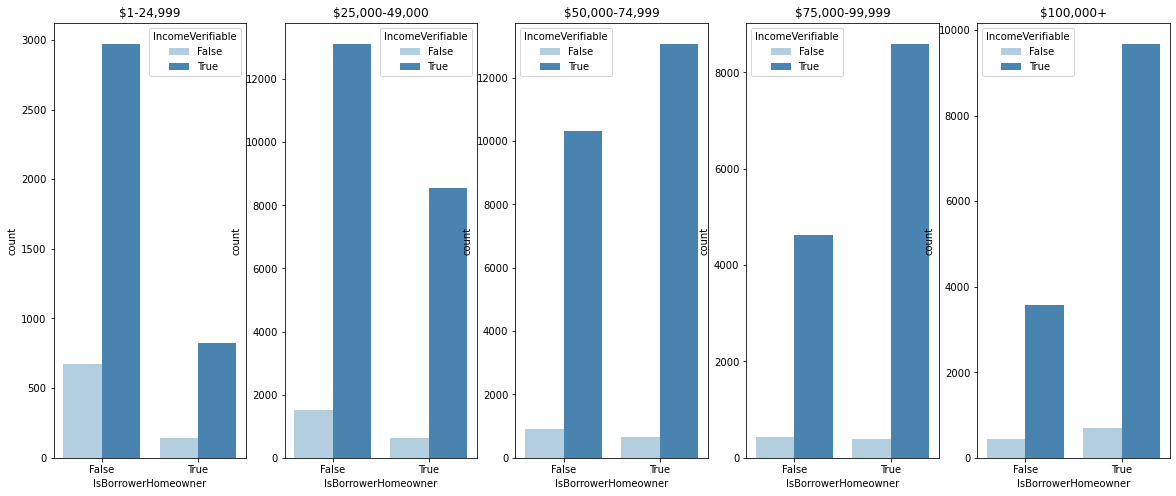

In [77]:


plt.figure(figsize = [20, 8])

plt.subplot(1, 5, 1)
sns.countplot(data = range_1, x = 'IsBorrowerHomeowner', hue = 'IncomeVerifiable', palette = 'Blues')
plt.title('$1-24,999')

plt.subplot(1, 5, 2)
sns.countplot(data = range_2, x = 'IsBorrowerHomeowner', hue = 'IncomeVerifiable', palette = 'Blues')
plt.title('$25,000-49,000')

plt.subplot(1, 5, 3)
sns.countplot(data = range_3, x = 'IsBorrowerHomeowner', hue = 'IncomeVerifiable', palette = 'Blues')
plt.title('$50,000-74,999')

plt.subplot(1, 5, 4)
sns.countplot(data = range_4, x = 'IsBorrowerHomeowner', hue = 'IncomeVerifiable', palette = 'Blues')
plt.title('$75,000-99,999')

plt.subplot(1, 5, 5)
sns.countplot(data = range_5, x = 'IsBorrowerHomeowner', hue = 'IncomeVerifiable', palette = 'Blues')
plt.title('$100,000+')

plt.show();

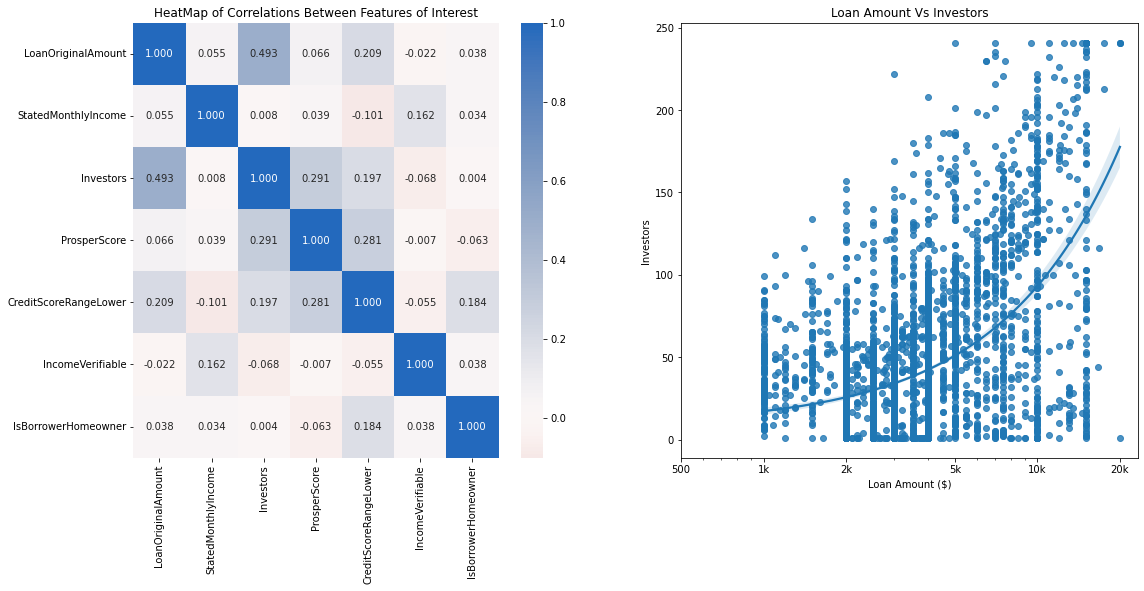

In [78]:
plt.figure(figsize = [18, 8])

b = ['LoanOriginalAmount',
 'StatedMonthlyIncome',
 'Investors',
 'ProsperScore',
 'CreditScoreRangeLower', 'IncomeVerifiable', 'IsBorrowerHomeowner']

plt.subplot(1, 2, 1)
sns.heatmap(range_1[b].corr(),  annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('HeatMap of Correlations Between Features of Interest')

plt.subplot(1, 2, 2)
sns.regplot(data = range_1, y = 'Investors', x= 'LoanOriginalAmount')
plt.xlabel('Loan Amount ($)')
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.ylabel('Investors')
plt.title('Loan Amount Vs Investors')


plt.show();

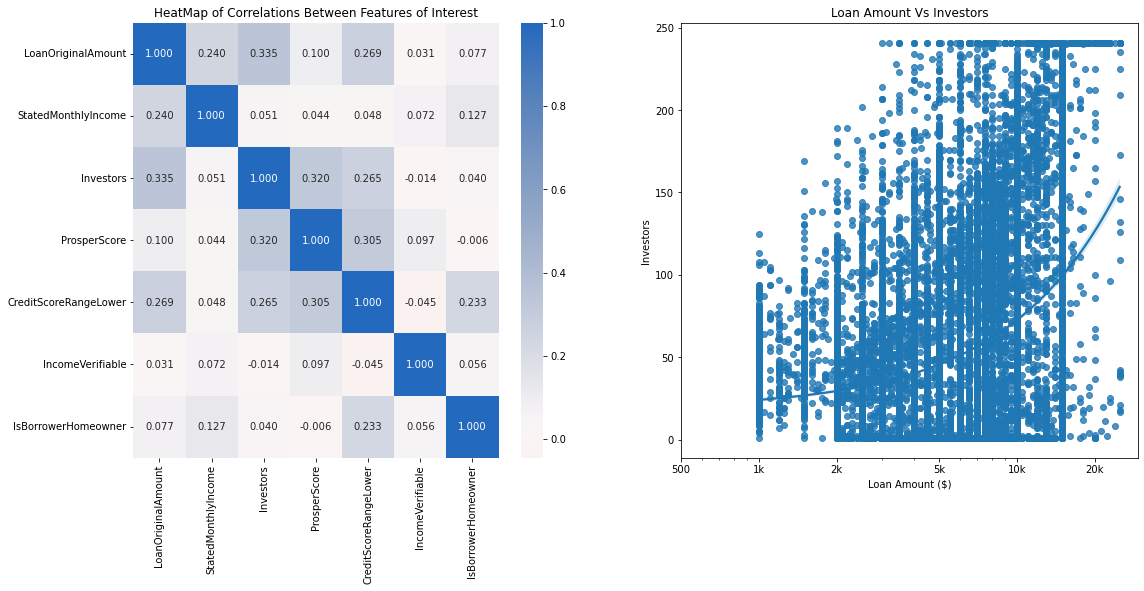

In [79]:
plt.figure(figsize = [18, 8])
plt.subplot(1, 2, 1)
sns.heatmap(range_2[b].corr(),  annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('HeatMap of Correlations Between Features of Interest')

plt.subplot(1, 2, 2)
sns.regplot(data = range_2, y = 'Investors', x= 'LoanOriginalAmount')
plt.xlabel('Loan Amount ($)')
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.ylabel('Investors')
plt.title('Loan Amount Vs Investors')
plt.show();

## Conclusions


I initially started my investigation trying to understand if the credit score could influence the loan amount. I extended my investigation and looked at how categorical features like the income range, income verifiable, and whether the borrower was a homeowner interact with the loan amount. The multivariate exploration continued to show the income range strongly influences the loan amount positively. Additionally, it showed that the stated monthly income, income verifiable and isborrowerhomeowner, credit score, and the prosper score features impact the loan amount positively howbeit not strong.


Before working with the dataset I dropped rows with missing and duplicate values from my select features of interest and dropped outliers.

During the exploration phase:
* I used histograms, bar charts, and box plots to plot the distribution of the features of interest during the univariate exploration.
* For the bivariate explorations I used scatter plots, histograms, box plots, violin plots, and a heat map.
* For the multivariate exploration I used faceted 2D histograms, point plots and a heat map to observe interactions between the numeric features and the categoric features.






In [80]:
loans.shape

(81857, 81)